# Modern Deep Learning: 
# Classify Fashion-MNIST with a simple CNN in Keras

<br> Original by Margaret Maynard-Reid, 4/24/2018
<br> **Oringal Notebook**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


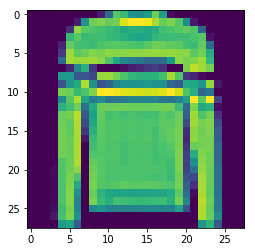

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [5]:
BATCH_SIZE=1000
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s 240us/step - loss: 5.6172 - acc: 0.5389 - val_loss: 0.5335 - val_acc: 0.8219
Epoch 2/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.5792 - acc: 0.7907 - val_loss: 0.4410 - val_acc: 0.8466
Epoch 3/20
48000/48000 [==============================] - 8s 172us/step - loss: 0.4923 - acc: 0.8178 - val_loss: 0.3675 - val_acc: 0.8701
Epoch 4/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.4456 - acc: 0.8362 - val_loss: 0.3526 - val_acc: 0.8697
Epoch 5/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.4118 - acc: 0.8490 - val_loss: 0.3322 - val_acc: 0.8805
Epoch 6/20
48000/48000 [==============================] - 10s 200us/step - loss: 0.3918 - acc: 0.8554 - val_loss: 0.3078 - val_acc: 0.8842
Epoch 7/20
48000/48000 [==============================] - 11s 227us/step - loss: 0.3691 - acc: 0.8652 - val_loss: 0.2965

In [6]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60000/60000 [==============================] - 3s 51us/step


0.9229166666666667

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

10000/10000 [==============================] - 1s 53us/step


0.8997

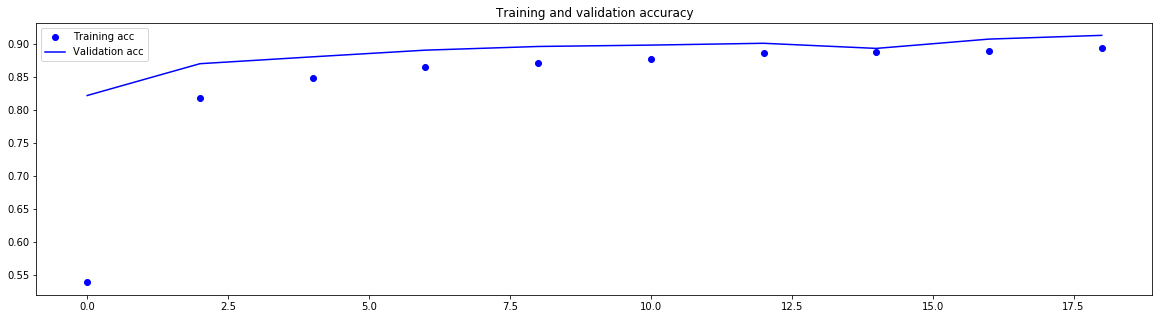

In [8]:
import pandas as pd

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'bo', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

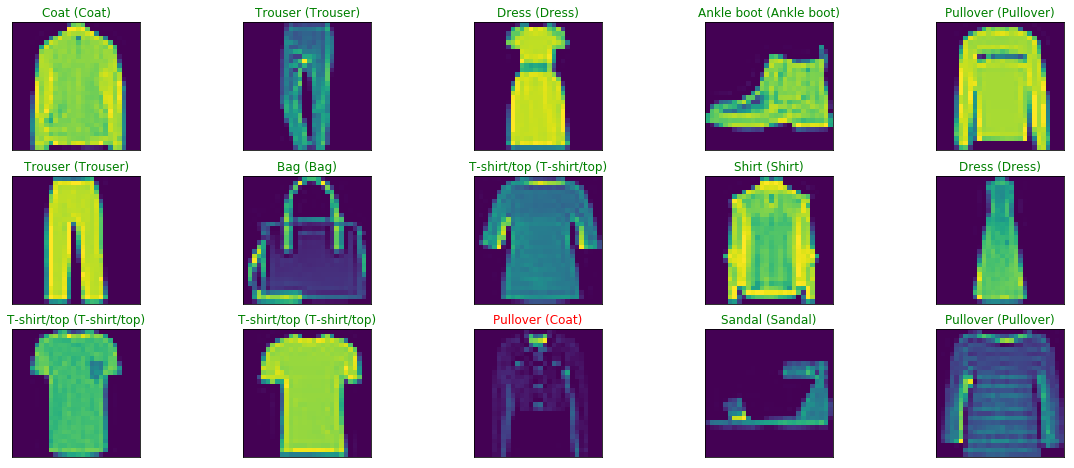

In [12]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))